In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df.shape

(614, 13)

In [14]:
#Impute missing gender with most common gender (Male) -> eventually should use probabilistic ratio of males/females
df.Gender.fillna('Male',inplace=True)

In [15]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [16]:
df.Married.fillna('Yes',inplace=True)

In [22]:
df.Dependents.fillna('0',inplace=True)

In [23]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
df.Self_Employed.fillna('No',inplace=True)

In [26]:
df.LoanAmount.fillna(df.LoanAmount.median(),inplace=True)

In [27]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
df.Loan_Amount_Term.fillna(360.0,inplace=True)

In [29]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [30]:
df.Credit_History.fillna(1.0,inplace=True)

In [31]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
df.drop('Loan_ID',axis=1,inplace=True)

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [36]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [40]:
df['is_male'] = df.Gender.map(lambda x: 1 if x == 'Male' else 0)
df.Married = df.Married.map(lambda x: 1 if x == 'Yes' else 0)
df['Graduate'] = df.Education.map(lambda x: 1 if x == 'Graduate' else 0)
df.Self_Employed = df.Self_Employed.map(lambda x: 1 if x == 'Yes' else 0)
df['Urbanity'] = df.Property_Area.map(lambda x: 0 if x == 'Rural' else 1 if x == 'Semiurban' else 2)

In [41]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,is_male,Graduate,Urbanity
0,Male,0,0,Graduate,0,5849,0.0,128.0,360.0,1.0,Urban,Y,1,1,2
1,Male,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0
2,Male,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,2
3,Male,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,2
4,Male,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,1,2


In [44]:
df.Dependents = df.Dependents.map(lambda x: 3 if x == '3+' else int(x))

In [43]:
df.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [46]:
df.Loan_Status = df.Loan_Status.map(lambda x: 1 if x == 'Y' else 0)

In [49]:
df.drop(['Gender','Education','Property_Area'],axis=1,inplace=True)

In [50]:
df.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,is_male,Graduate,Urbanity
0,0,0,0,5849,0.0,128.0,360.0,1.0,1,1,1,2
1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,1,0
2,1,0,1,3000,0.0,66.0,360.0,1.0,1,1,1,2
3,1,0,0,2583,2358.0,120.0,360.0,1.0,1,1,0,2
4,0,0,0,6000,0.0,141.0,360.0,1.0,1,1,1,2


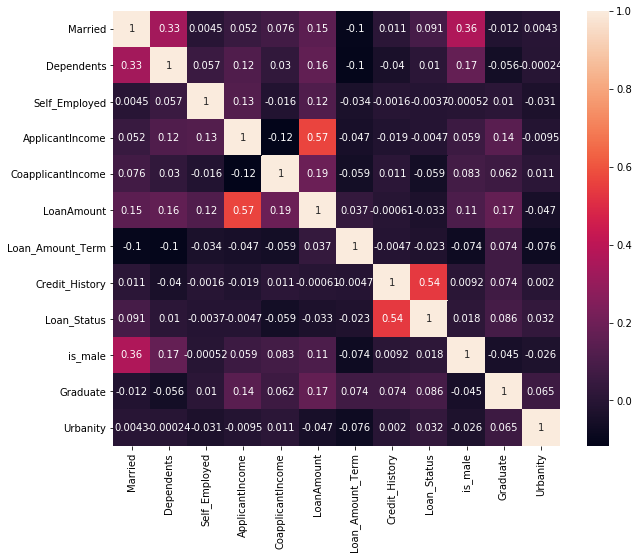

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.savefig('loan_heatmap.png')

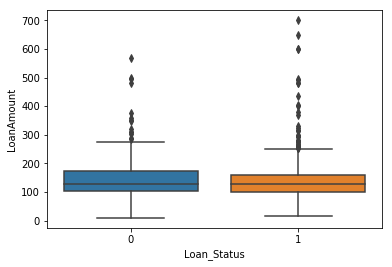

In [104]:
sns.boxplot(x=df.Loan_Status,y=df.LoanAmount)
plt.savefig('amount_status_box.png')

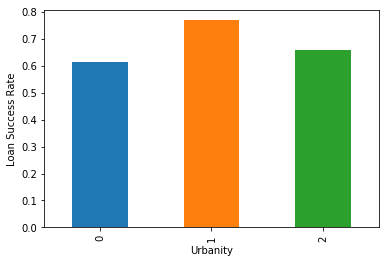

In [105]:
#0 = rural, 1 = semiurban, 2 = urban
df.groupby('Urbanity').mean().Loan_Status.plot(kind='bar')
plt.ylabel('Loan Success Rate')
plt.savefig('success_rate_urbanity_bar.png')

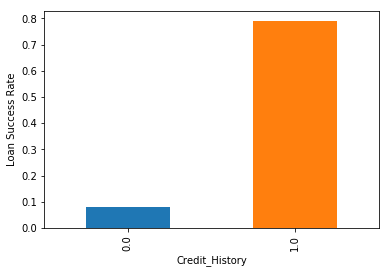

In [106]:
df.groupby('Credit_History').mean().Loan_Status.plot(kind='bar')
plt.ylabel('Loan Success Rate')
plt.savefig('success_rate_history_bar.png')

In [60]:
X = df.drop('Loan_Status',axis=1)
y = df.Loan_Status 

In [68]:
#Default success rate
y.mean()

0.6872964169381107

In [62]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
model = RandomForestClassifier()

In [70]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
model.score(X_train,y_train)

0.99270072992700731

In [72]:
model.score(X_test,y_test)

0.77832512315270941

In [73]:
model.feature_importances_

array([ 0.0257482 ,  0.0441812 ,  0.01703883,  0.20315853,  0.11041838,
        0.19670328,  0.05016677,  0.26179359,  0.02189348,  0.02606627,
        0.04283147])

In [74]:
X.columns

Index(['Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'is_male', 'Graduate', 'Urbanity'],
      dtype='object')

In [97]:
gs = GridSearchCV(RandomForestClassifier(),param_grid={
    'n_estimators':[10,15,20,30,40],
    'max_depth':[None,3,5,7],
    'min_samples_leaf':[2,3,4,5]    
},verbose=1)
gs.fit(X_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    8.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 15, 20, 30, 40], 'max_depth': [None, 3, 5, 7], 'min_samples_leaf': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [98]:
gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 15}

In [99]:
print('train',gs.score(X_train,y_train))
print('test',gs.score(X_test,y_test))

train 0.812652068127
test 0.79802955665


In [100]:
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [102]:
test.shape

(367, 12)